# What patterns can be observed in course offerings with respect to meeting times and meeting days?

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
os.chdir(os.path.dirname(os.getcwd()))


In [2]:
# Load data
df = pd.read_excel("data/df_grad_filtered.xlsx")

## Count of Meeting Days & Time Slot

C:\Users\ramte\AppData\Local\Temp\ipykernel_20644\2771737935.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtered['Start Hour'] = pd.to_datetime(df_filtered['Meeting Time Start'], errors='coerce').dt.hour


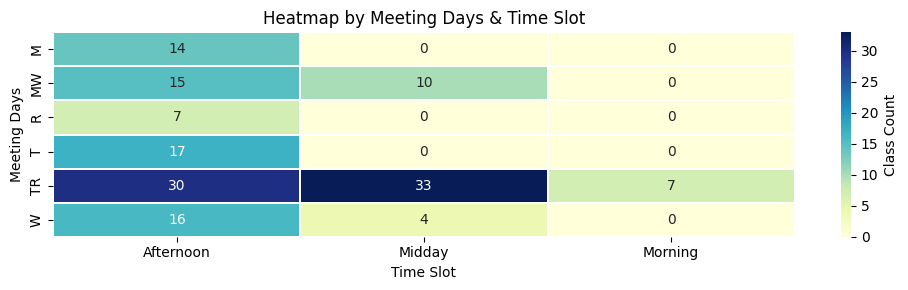

In [3]:
# Filter out rows with invalid meeting times or days
df_filtered = df[
    (df['Meeting Time Start'].notna()) &
    (df['Meeting Days'].notna()) &
    (df['Meeting Time Start'] != '00:00:00') &
    (df['Meeting Days'] != '-')
].copy()

# Extract hour from meeting time
df_filtered['Start Hour'] = pd.to_datetime(df_filtered['Meeting Time Start'], errors='coerce').dt.hour

# Create time slot labels
def assign_time_bucket(hour):
    if pd.isna(hour):
        return None
    elif hour < 11:
        return "Morning"
    elif 11 <= hour < 14:
        return "Midday"
    else:
        return "Afternoon"

df_filtered['Time Slot'] = df_filtered['Start Hour'].apply(assign_time_bucket)

# Trim whitespace in meeting days
df_filtered['Meeting Days'] = df_filtered['Meeting Days'].str.strip()

# Filter for In-Person only
df_inperson = df_filtered[df_filtered['Instruction Mode'].str.strip() == "In Person"]

# Create pivot table (Meeting Days as-is)
heatmap_inperson = df_inperson.groupby(['Meeting Days', 'Time Slot']).size().unstack(fill_value=0)

# Plot heatmap for In-Person classes
plt.figure(figsize=(10, len(heatmap_inperson) * 0.5))
sns.heatmap(heatmap_inperson, annot=True, fmt='d', cmap="YlGnBu", linewidths=0.3, cbar_kws={'label': 'Class Count'})
plt.title("Heatmap by Meeting Days & Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Meeting Days")
plt.tight_layout()
plt.show()

**Outcome:**
- TR (Tuesday & Thursday) is the most common schedule, with high class counts in both Midday (33) and Afternoon (30) slots.

- MW (Monday & Wednesday) also has a decent number of classes, especially in Afternoon (15) and Midday (10).

- Afternoon classes are the most common across almost all days.

- Morning slots are rarely used, with only 7 classes offered in that time (all on TR).

- Single-day classes (like M, T, W, R) are offered less frequently than multi-day formats (MW, TR).

- There is a clear preference for Midday and Afternoon sessions, especially on TR and MW.


## Course Meetings by Time & Course

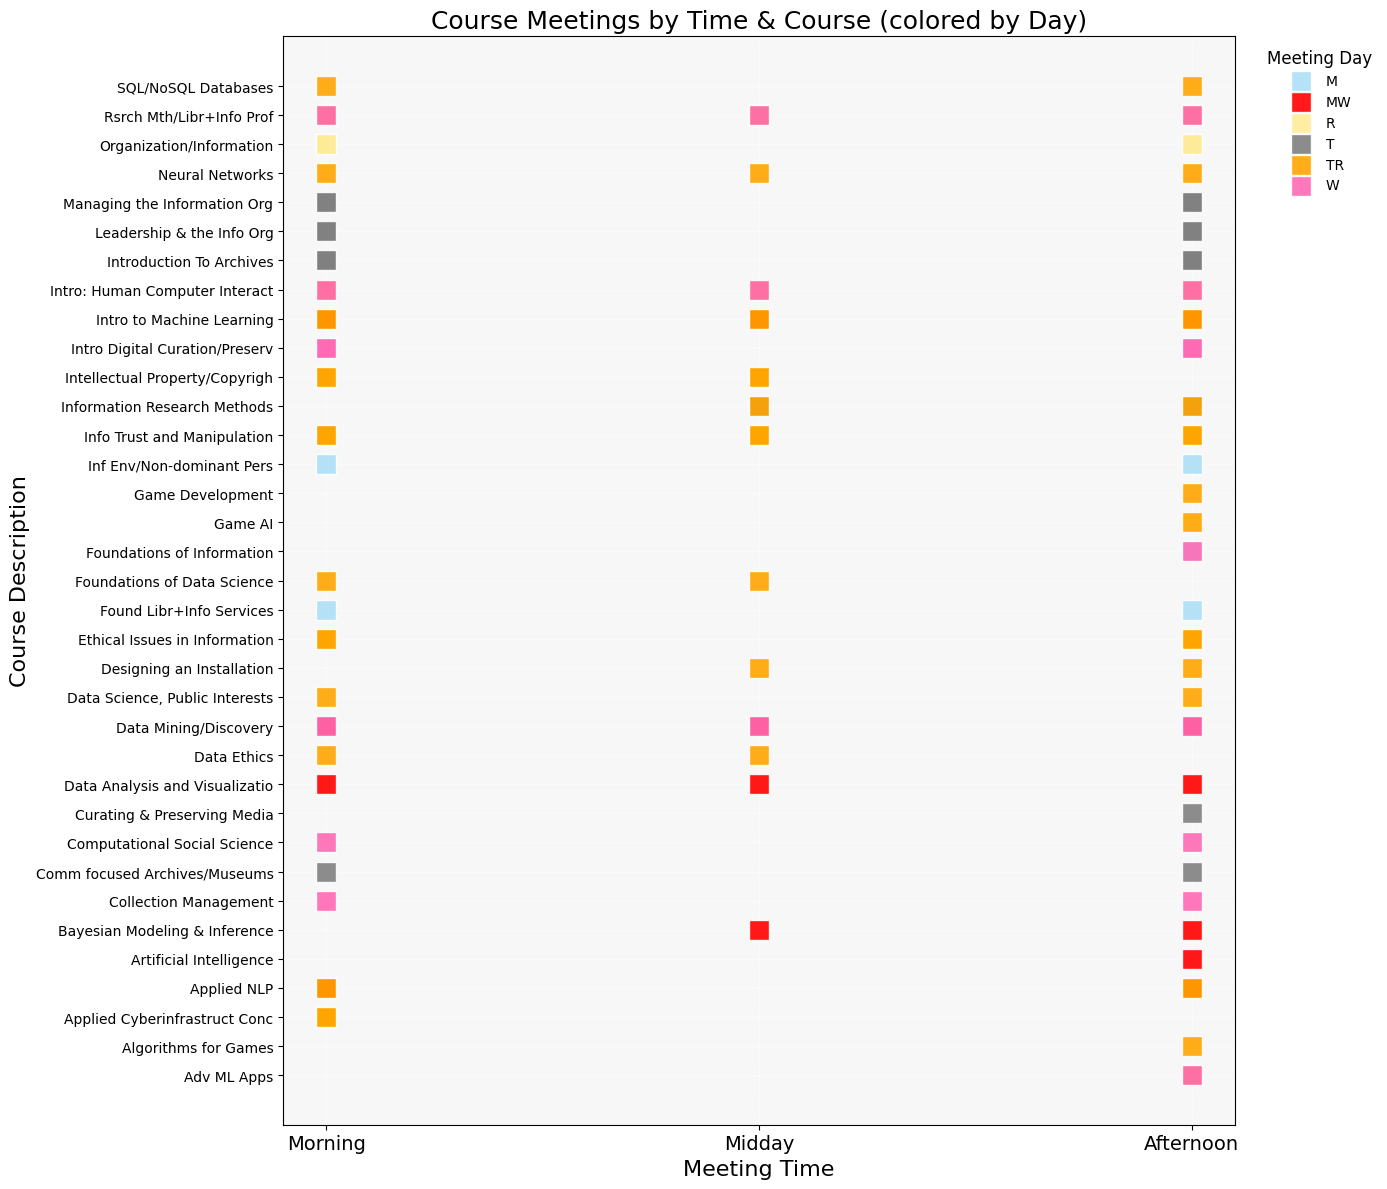

In [4]:
# Load and filter
df = pd.read_excel('data/Meeting_time_split.xlsx')
df = df[df['Meeting Days'] != '-'].copy()

# Define the ordering of your categories
time_buckets = ['Morning', 'Midday', 'Afternoon']
day_codes    = sorted(df['Meeting Days'].unique())
course_list  = sorted(df['Course Description'].unique())

# Convert to categorical codes for plotting positions
df['time_code']   = pd.Categorical(df['Meeting Time'], categories=time_buckets, ordered=True).codes
df['course_code'] = pd.Categorical(df['Course Description'], categories=course_list, ordered=True).codes

# Choose colors: highlight MW & TR dark, others light pastels
day_to_color = {
    'M':  '#AEDFF7',
    'T':  '#808080',
    'W':  '#FF69B4',
    'R':  '#FFEB99',
    'MW': '#FF0000',   
    'TR': '#FFA500',   
}

# Plot
fig, ax = plt.subplots(
    figsize=(14, max(12, len(course_list)*0.25))
)
ax.set_facecolor('#F7F7F7')
ax.set_axisbelow(True)
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='white')

for day in day_codes:
    sub = df[df['Meeting Days'] == day]
    ax.scatter(
        sub['time_code'],
        sub['course_code'],
        s=200,
        marker='s',
        color=day_to_color.get(day, '#CCCCCC'),
        edgecolor='white',
        label=day,
        alpha=0.9
    )

# Tidy axes & legend
ax.set_xticks(range(len(time_buckets)))
ax.set_xticklabels(time_buckets, fontsize=14)
ax.set_yticks(range(len(course_list)))
ax.set_yticklabels(course_list, fontsize=10)
ax.set_xlabel('Meeting Time', fontsize=16)
ax.set_ylabel('Course Description', fontsize=16)
ax.set_title('Course Meetings by Time & Course (colored by Day)', fontsize=18)

ax.legend(
    title='Meeting Day',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize='medium',
    title_fontsize='large',
    frameon=False
)

plt.tight_layout()
plt.show()

**Outcome:**
- Most courses are scheduled in the afternoon, indicating a preference or scheduling tendency for later time slots.

- Tuesday and Thursday (TR) are the most commonly used meeting days across all time slots.

- Morning sessions are the least utilized, with very few courses scheduled before 11 AM.

- A few courses appear in both midday and afternoon, which may indicate multiple sections or inconsistent scheduling across terms.

- Meeting patterns like MW (Monday and Wednesday) or W-only are rarely used.

**Overlap and Scheduling Suggestions:**
- There appears to be a high concentration of courses on TR afternoons, which may lead to conflicts for students wanting to take multiple TR-based courses.

- To reduce overlap and improve scheduling flexibility, consider distributing courses more evenly across MW and morning slots.

## Overlapping courses at afternoon on TR

In [5]:
# Filter to exclude invalid entries
df_filtered = df[
    (df['Meeting Days'] != '-') &
    (df['Instruction Mode'].str.strip() != 'Fully Online') &
    (df['Meeting Days'].str.strip() == 'TR') &
    (df['Meeting Time'].str.strip() == 'Afternoon')
]

# Display overlapping TR afternoon courses
overlapping_courses = df_filtered['Course Description'].value_counts()

from IPython.display import display
display(overlapping_courses)

Course Description
Info Trust and Manipulation       2
Ethical Issues in Information     2
Game AI                           1
Information Research Methods      1
Designing an Installation         1
Intro: Human Computer Interact    1
Intro to Machine Learning         1
Algorithms for Games              1
Data Science, Public Interests    1
Game Development                  1
Applied NLP                       1
Neural Networks                   1
SQL/NoSQL Databases               1
Adv ML Apps                       1
Rsrch Mth/Libr+Info Prof          1
Name: count, dtype: int64

## All records with proper meeting times and days

C:\Users\ramte\AppData\Local\Temp\ipykernel_20644\3149058760.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtered['Start Hour'] = pd.to_datetime(df_filtered['Meeting Time Start'], errors='coerce').dt.hour


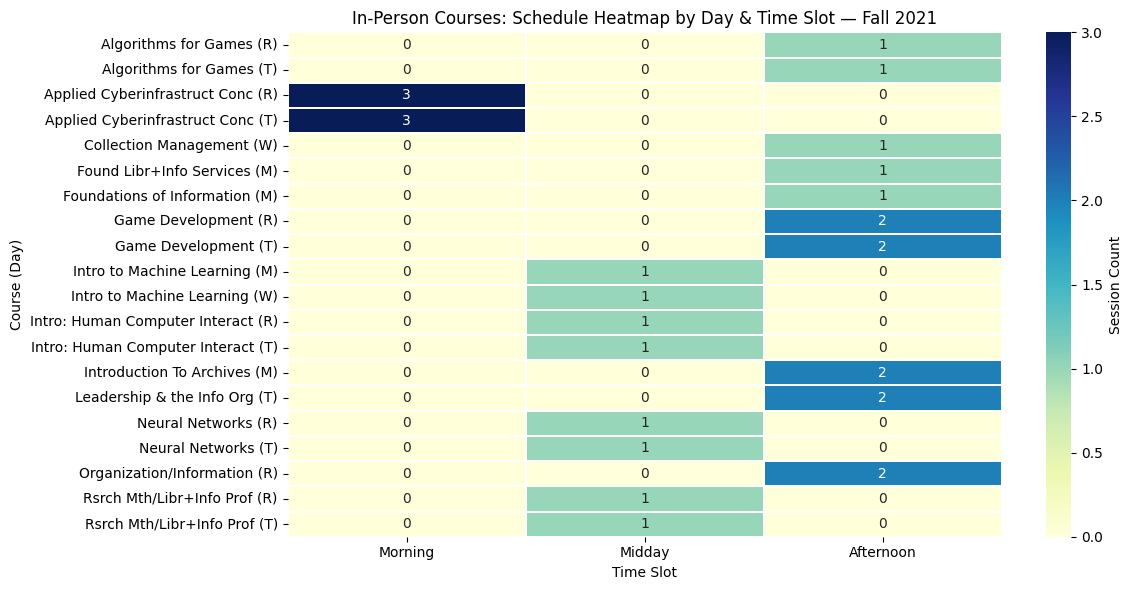

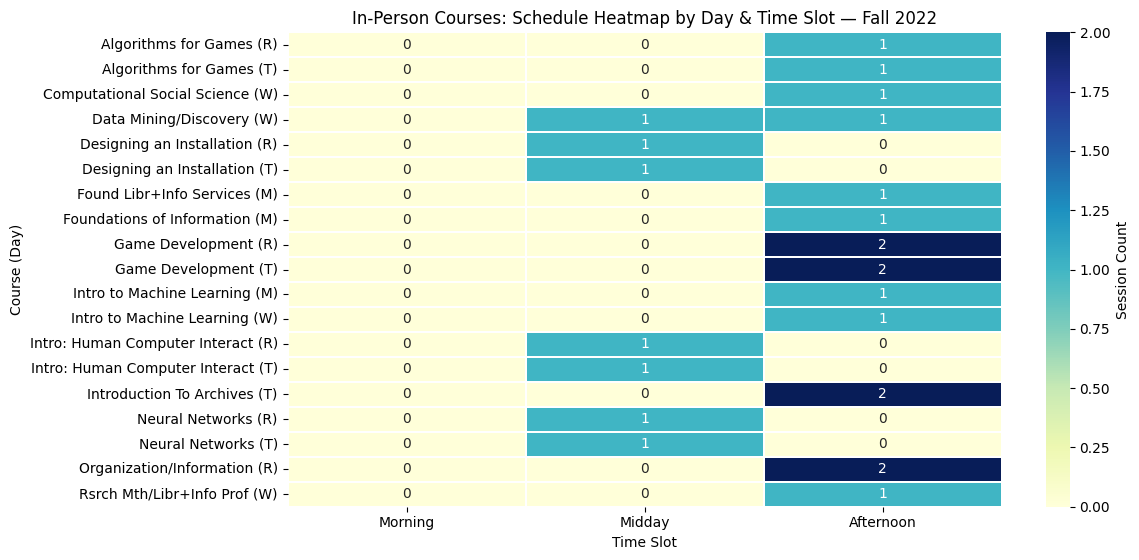

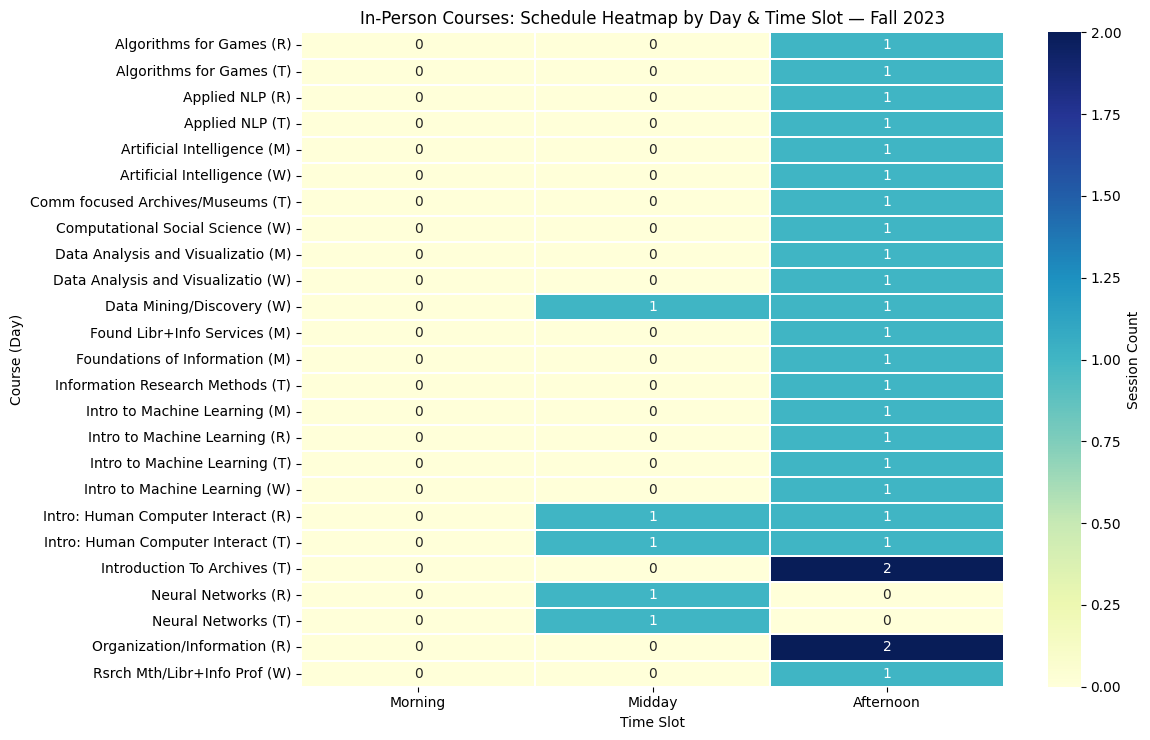

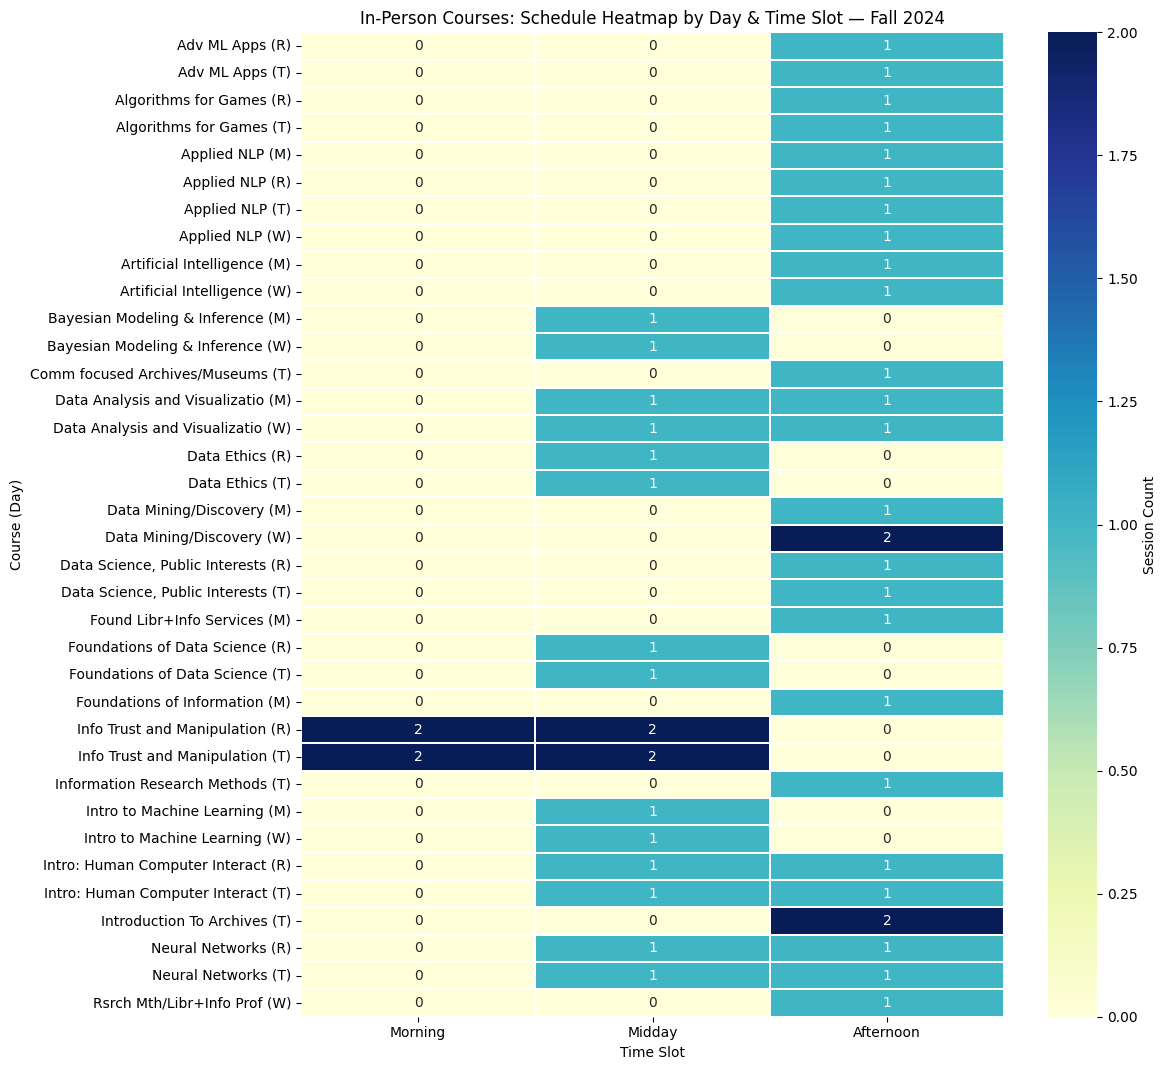

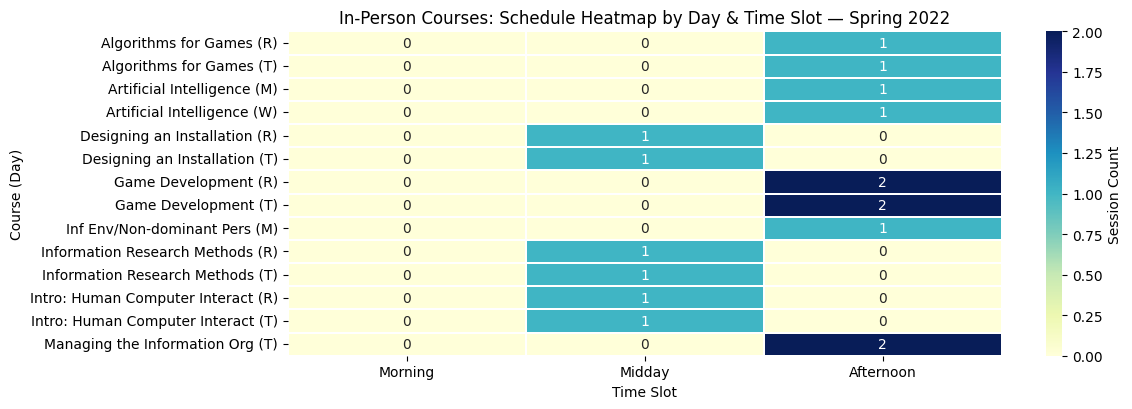

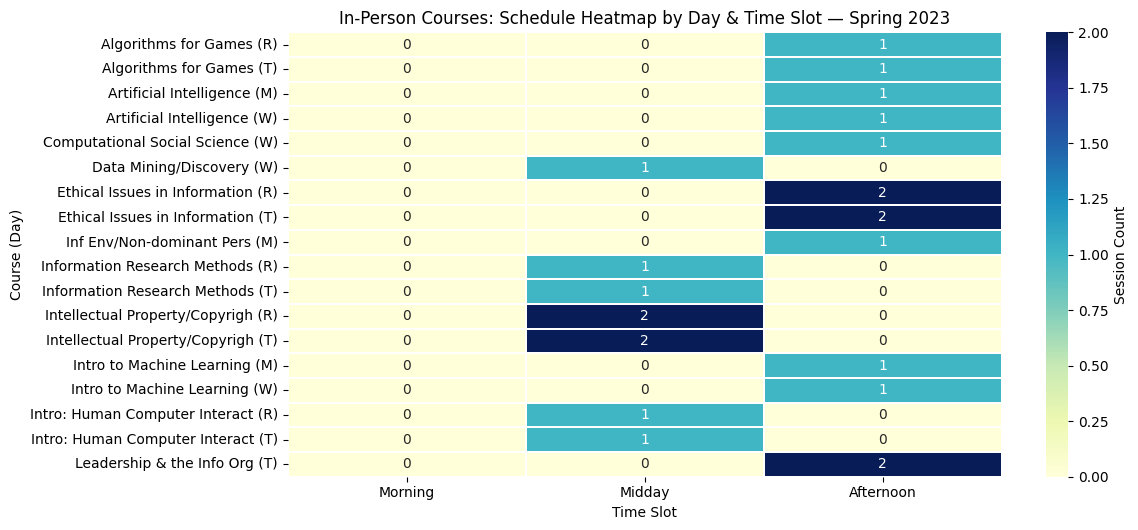

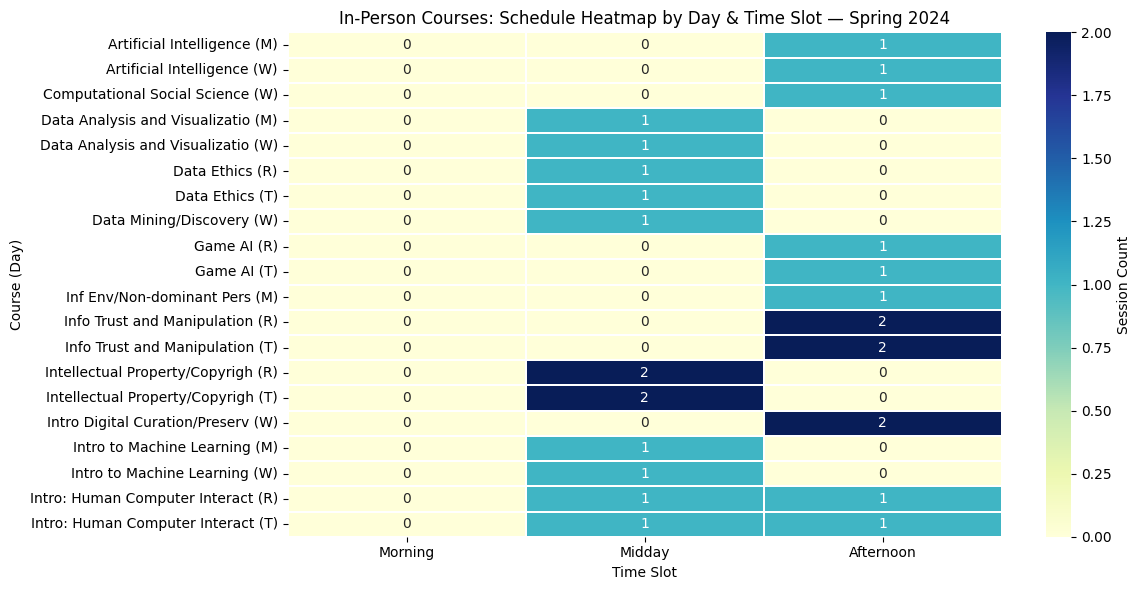

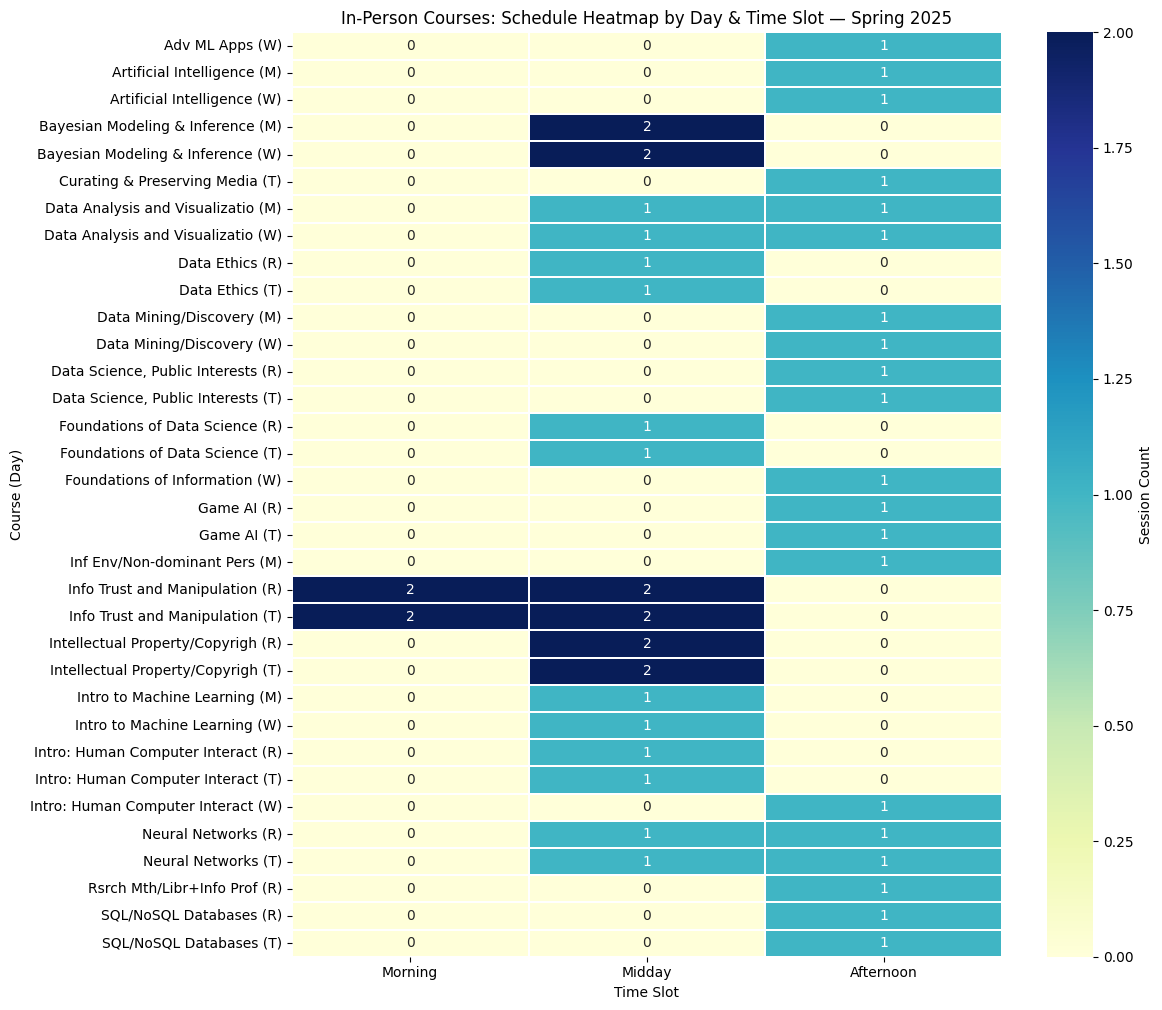

In [7]:
# Load data
df = pd.read_excel("data/df_grad_filtered.xlsx")

# Filter valid records with proper meeting times and days
df_filtered = df[
    (df['Meeting Time Start'].notna()) &
    (df['Meeting Days'].notna()) &
    (df['Meeting Time Start'] != '00:00:00') &
    (df['Meeting Days'] != '-')
].copy()

# Extract start hour from 'Meeting Time Start'
df_filtered['Start Hour'] = pd.to_datetime(df_filtered['Meeting Time Start'], errors='coerce').dt.hour

# Categorize into time slots
def assign_time_bucket(hour):
    if pd.isna(hour):
        return None
    elif hour < 11:
        return "Morning"
    elif 11 <= hour < 14:
        return "Midday"
    else:
        return "Afternoon"

df_filtered['Time Slot'] = df_filtered['Start Hour'].apply(assign_time_bucket)

# Expand meeting days into separate rows and include 'Term'
def expand_days_with_term(row):
    return pd.DataFrame({
        'Day': list(row['Meeting Days']),
        'Time Slot': [row['Time Slot']] * len(row['Meeting Days']),
        'Course Description': [row['Course Description']] * len(row['Meeting Days']),
        'Instruction Mode': [row['Instruction Mode']] * len(row['Meeting Days']),
        'Term': [row['Term']] * len(row['Meeting Days'])
    })

df_expanded = pd.concat(df_filtered.apply(expand_days_with_term, axis=1).tolist(), ignore_index=True)

# Filter for In-Person courses only
df_inperson = df_expanded[df_expanded['Instruction Mode'].str.strip() == "In Person"].copy()

# Group by Term, Course, Day, and Time Slot
matrix_termwise = (
    df_inperson.dropna(subset=["Day", "Time Slot", "Course Description", "Term"])
    .groupby(["Term", "Course Description", "Day", "Time Slot"])
    .size()
    .reset_index(name="Count")
)

# Create combined row labels
matrix_termwise["Row Index"] = matrix_termwise["Course Description"] + " (" + matrix_termwise["Day"] + ")"

# Get list of unique terms
unique_terms = matrix_termwise["Term"].unique()

# Plot heatmap for each term
for term in unique_terms:
    term_data = matrix_termwise[matrix_termwise["Term"] == term]
    pivot_data = term_data.pivot(index="Row Index", columns="Time Slot", values="Count").fillna(0)

    # Reorder columns for consistent layout
    time_order = ["Morning", "Midday", "Afternoon"]
    pivot_data = pivot_data.reindex(columns=time_order, fill_value=0)

    # Plot heatmap
    plt.figure(figsize=(12, len(pivot_data) * 0.3))
    sns.heatmap(pivot_data, annot=True, fmt='g', cmap="YlGnBu", linewidths=0.3, cbar_kws={'label': 'Session Count'})
    plt.title(f"In-Person Courses: Schedule Heatmap by Day & Time Slot — {term}")
    plt.xlabel("Time Slot")
    plt.ylabel("Course (Day)")
    plt.tight_layout()
    plt.show()
